In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from copulas.multivariate import GaussianMultivariate
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
from gaussian_multivariate import DataPreProcessor

In [3]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/GM/E_PimaIndiansDiabetes_Synthetic_GM.csv'

## 1. Read data

In [4]:
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_features = ['Outcome']
for c in categorical_features :
    real_data[c] = real_data[c].astype('category')
data_train = real_data
data_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,84,0,0,0,0.0,0.304,21,0
1,9,112,82,24,0,28.2,1.282,50,1
2,1,139,46,19,83,28.7,0.654,22,0
3,0,161,50,0,0,21.9,0.254,65,0
4,6,134,80,37,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
609,5,139,64,35,140,28.6,0.411,26,0
610,1,96,122,0,0,22.4,0.207,27,0
611,10,101,86,37,0,45.6,1.136,38,1
612,0,141,0,0,0,42.4,0.205,29,1


In [5]:
data_train.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [6]:
# data configuration
preprocessor = DataPreProcessor(data_train)
data_train = preprocessor.preprocess_train_data()
data_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome0,Outcome1
0,2,84,0,0,0,0.0,0.304,21,0.730957,0.500000
1,9,112,82,24,0,28.2,1.282,50,0.500000,0.730957
2,1,139,46,19,83,28.7,0.654,22,0.730957,0.500000
3,0,161,50,0,0,21.9,0.254,65,0.730957,0.500000
4,6,134,80,37,370,46.2,0.238,46,0.500000,0.730957
...,...,...,...,...,...,...,...,...,...,...
609,5,139,64,35,140,28.6,0.411,26,0.730957,0.500000
610,1,96,122,0,0,22.4,0.207,27,0.730957,0.500000
611,10,101,86,37,0,45.6,1.136,38,0.500000,0.730957
612,0,141,0,0,0,42.4,0.205,29,0.500000,0.730957


## 2. Train the model and generate data

In [7]:
gm = GaussianMultivariate()
gm.fit(data_train)

In [8]:
generated_samples = gm.sample(len(data_train))
generated_samples

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome0,Outcome1
0,11.399389,140.872403,67.835992,-6.853318,139.929193,21.454652,0.138648,45.088955,0.703050,0.527929
1,0.874923,111.961379,63.749081,-0.997724,108.555224,23.818868,0.347041,25.364178,0.736685,0.494278
2,5.037758,88.997165,77.753003,14.846026,-64.869649,27.547578,0.331241,63.211324,0.570198,0.659385
3,3.700392,94.643884,79.772473,25.329637,120.461683,32.149746,0.164218,38.956128,0.503319,0.727670
4,9.344510,131.818856,-0.107772,29.474543,244.328136,30.608647,0.296024,25.292337,0.501997,0.728925
...,...,...,...,...,...,...,...,...,...,...
609,4.795059,132.118406,64.618245,37.421003,-43.725533,40.607103,0.863559,42.332900,0.486185,0.744776
610,7.692731,114.784634,79.465534,20.753003,-7.904707,29.984722,0.427422,21.090550,0.688155,0.542890
611,1.161470,68.370002,71.360028,1.301414,-89.587997,23.307341,0.261145,22.516264,0.751463,0.479518
612,6.875890,97.846670,73.362614,32.331141,257.668100,27.208406,0.176116,29.892346,0.782781,0.448157


## 3. Transform Generated Data

In [9]:
synthetic_data = preprocessor.transform_data(generated_samples)
synthetic_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,11,140,67,-6,139,21.454652,0.138648,45,0
1,0,111,63,0,108,23.818868,0.347041,25,0
2,5,88,77,14,-64,27.547578,0.331241,63,1
3,3,94,79,25,120,32.149746,0.164218,38,1
4,9,131,0,29,244,30.608647,0.296024,25,1
...,...,...,...,...,...,...,...,...,...
609,4,132,64,37,-43,40.607103,0.863559,42,1
610,7,114,79,20,-7,29.984722,0.427422,21,0
611,1,68,71,1,-89,23.307341,0.261145,22,0
612,6,97,73,32,257,27.208406,0.176116,29,0


In [10]:
real_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,69.415309,20.399023,81.438111,31.983388,0.469168,32.907166
std,3.313264,32.035057,18.512599,15.433974,116.234835,7.740625,0.336847,11.503437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
synthetic_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.671010,120.097720,69.190554,19.097720,81.859935,31.885004,0.469767,33.350163,0.384365
std,3.436097,31.993885,19.209360,16.531651,114.708482,7.748132,0.314734,11.167983,0.486841
min,-2.000000,-16.000000,-11.000000,-10.000000,-260.000000,-2.396146,0.077674,21.000000,0.000000
25%,1.000000,100.000000,63.000000,2.000000,4.000000,26.599240,0.246140,25.000000,0.000000
50%,3.000000,116.000000,72.000000,20.000000,80.500000,31.743520,0.383906,30.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,158.000000,36.856790,0.615437,39.000000,1.000000
max,15.000000,210.000000,122.000000,65.000000,380.000000,58.136572,2.247751,76.000000,1.000000


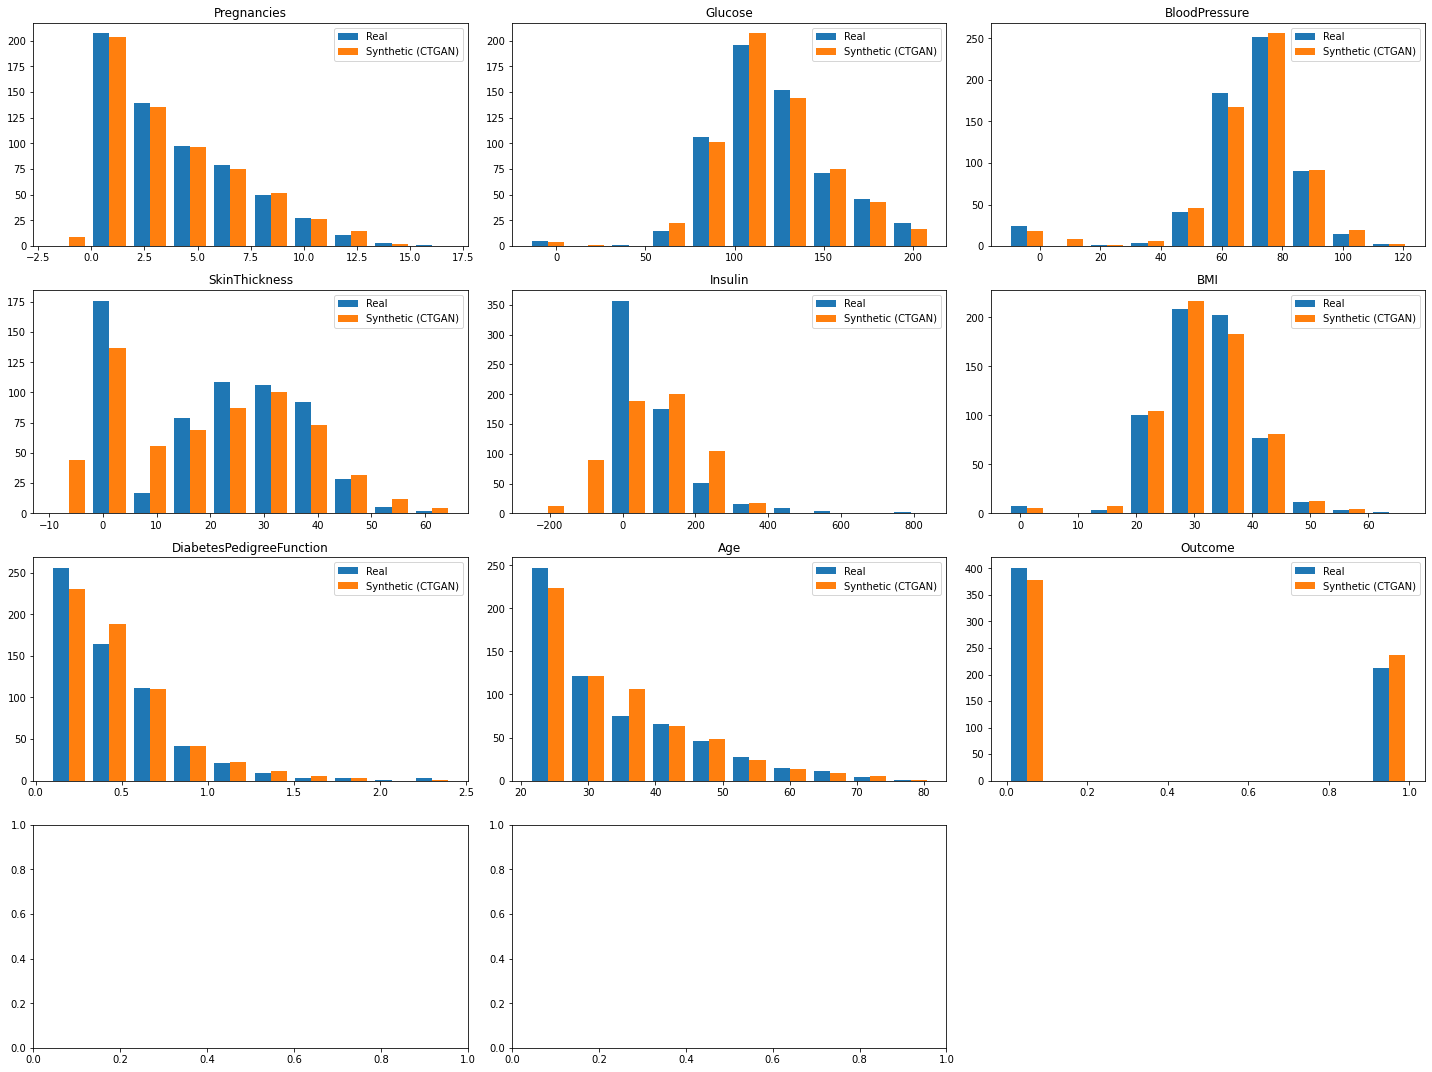

In [12]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (CTGAN)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[3,2])
fig.tight_layout(pad=1.1)

In [13]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)